In [28]:
import ast, pandas as pd
df = pd.read_csv('data/bequant_BCHUSDT_20210304.csv')
limit_lob = (len(df.iloc[0])-20)//4
columns = ['timestamp_ticker', 'bid', 'ask', 'vwap', 'bidVolume', 'askVolume', 'base24hVolume', 'quote24hVolume', 'trades_std_price', 'trades_std_buyPrice', 'trades_std_sellPrice', 
        'trades_std_volume', 'trades_std_buyVolume', 'trades_std_sellVolume', 'trades_volume', 'trades_buyVolume', 'trades_sellVolume', 'trades_total_time', 'trades_nbs_trades']
for i in range(limit_lob):
    columns.append('bidVolume_{}'.format(i))
    columns.append('bidPrice_{}'.format(i))
for i in range(limit_lob):
    columns.append('askVolume_{}'.format(i))
    columns.append('askPrice_{}'.format(i))
columns.append('timestamp_lob')
df.columns = columns
df.loc[:,'date'] = pd.to_datetime(df.timestamp_ticker, unit='ms')

In [78]:
df.head(5)

,timestamp_ticker,bid,ask,vwap,bidVolume,askVolume,base24hVolume,quote24hVolume,trades_std_price,trades_std_buyPrice,...,askVolume_6,askPrice_6,askVolume_7,askPrice_7,askVolume_8,askPrice_8,askVolume_9,askPrice_9,timestamp_lob,date
0,1614881428368,505.000,505.072,520.773646,None,None,225792.3981,1.175867e+08,1.503520,1.481778,...,0.505,505.606,1.5000,505.713,0.49,505.714,4.3000,506.048,None,2021-03-04 18:10:28.368
1,1614881437669,505.000,505.091,520.773646,None,None,225792.3981,1.175867e+08,1.503520,1.481778,...,1.500,505.711,1.5000,505.712,3.40,505.713,8.6000,506.026,None,2021-03-04 18:10:37.669
2,1614881446970,505.000,505.109,520.773612,None,None,225792.8880,1.175870e+08,1.475645,1.481778,...,0.505,505.865,10.0664,505.890,5.80,506.131,4.9000,506.132,None,2021-03-04 18:10:46.970
3,1614881456271,504.991,505.245,520.772971,None,None,225802.0659,1.175916e+08,1.454938,1.360944,...,3.400,506.034,14.3203,506.101,2.41,506.183,16.8724,506.365,None,2021-03-04 18:10:56.271
4,1614881465569,505.195,505.526,520.772952,None,None,225801.8236,1.175915e+08,1.454938,1.360944,...,3.400,506.432,10.1320,506.459,2.41,506.673,1.5000,506.874,None,2021-03-04 18:11:05.569


In [25]:
for i in range(len(df.columns)):
    print([col for col in df.columns][i],':\t',df.iloc[0].values[i])

timestamp_ticker :	 1614881428368
bid :	 505.0
ask :	 505.072
vwap :	 520.7736461338218
bidVolume :	 None
askVolume :	 None
base24hVolume :	 225792.3981
quote24hVolume :	 117586730.4278364
trades_std_price :	 1.503519969238852
trades_std_buyPrice :	 1.4817779314507378
trades_std_sellPrice :	 1.5113564240676196
trades_std_volume :	 86.18441291556998
trades_std_buyVolume :	 122.43457485543712
trades_std_sellVolume :	 64.61468056683393
trades_volume :	 3242.0456000000004
trades_buyVolume :	 1685.0164000000002
trades_sellVolume :	 1557.0292000000002
trades_total_time :	 844168
trades_nbs_trades :	 100
bidVolume_0 :	 9.1779
bidPrice_0 :	 505.0
bidVolume_1 :	 2.6939
bidPrice_1 :	 504.903
bidVolume_2 :	 0.0143
bidPrice_2 :	 504.737
bidVolume_3 :	 5.8133
bidPrice_3 :	 504.619
bidVolume_4 :	 0.0042
bidPrice_4 :	 504.317
bidVolume_5 :	 3.4
bidPrice_5 :	 504.129
bidVolume_6 :	 9.5776
bidPrice_6 :	 504.128
bidVolume_7 :	 9.7834
bidPrice_7 :	 504.124
bidVolume_8 :	 1.5
bidPrice_8 :	 503.818
bidVolu

# Example of data plot

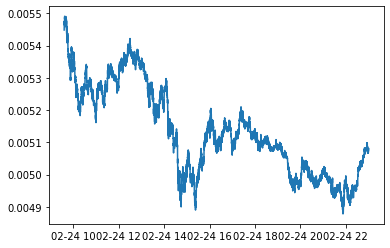

In [26]:
import matplotlib.pyplot as plt
def plot(df):

    # create fig subplot
    fig = make_subplots(rows=4, cols=1, 
                                shared_xaxes=True, 
                                vertical_spacing=0.1,
                                specs=[[{"type": "scatter"}],
                                       [{"type": "scatter"}],
                                       [{"type": "table"}],
                                       [{"type": "table"}]])
    
    # plot cumulative pnl
    fig.add_trace(go.Scatter(
        x=df_dailyTrades.exit_date,
        y=(df_dailyTrades.pnl).to_numpy().cumsum(),
        name="Cumulative pnl",
        line = {
            "color": rgb2hex(0,0,200)
        }
    ), row=1, col=1)

    # plot bar chart of daily pnl
    fig.add_trace(go.Bar(
        x=df_dailyTrades.exit_date,
        y=(df_dailyTrades.pnl).to_numpy(),
        name="Daily pnl",
        #marker_color = rgb2hex(255,0,0),
        marker = {
            "color": rgb2hex(255,0,0),
            "line": {
                "color": rgb2hex(255,0,0)
            }
        }
    ), row=2, col=1)

    # add metrics in a table
    fig.add_trace(go.Table(
            header=dict(
                values=["Trade pnl (%)", "Sharpe Ratio",
                        "Profit Factor", "Daily pnl (%)", "Trades per day",
                        "Accuracy","holding time (min)"],
                font=dict(size=10),
                align="left"
            ),
            cells=dict(
                values=[str(round(100*metrics['trade_pnl'],4))+' %',
                        str(round(1*metrics['sharpe_ratio'],3))+' ',
                        str(round(1*metrics['profit_factor'],3))+' ',
                        str(round(100*metrics['daily_pnl'],3))+' %',
                        str(round(1*metrics['trades_per_day'],1))+' ',
                        str(round(100*metrics['accuracy'],1))+' %',
                        str(round(metrics['avg_time_min'],1))+' min'
                       ],
                align = "left")
        ), row=3, col=1)
    
    # add metrics in a table
    header_signal = []
    values_signal = []
    for key in config_signal.keys():
        header_signal.append(key)
        values_signal.append(str(config_signal[key]))
    fig.add_trace(go.Table(
            header=dict(
                values=header_signal,
                font=dict(size=10),
                align="left"
            ),
            cells=dict(
                values=values_signal,
                align = "left")
        ), row=4, col=1)
    
    
    # edit layout config
    fig.update_layout(
        height = 600,
        width = 1200,
        showlegend = True,
        title_text = "Backtesting results",
        plot_bgcolor = rgb2hex(240,240,240), #"#21201f",
        paper_bgcolor = rgb2hex(240,240,240), #"21201f",
        font=dict(color= rgb2hex(30,30,30)), #'#dedddc'),
        dragmode='pan',
        hovermode='x unified'
    )
    
    # edit x axes config
    fig.update_xaxes(
        showgrid=False, 
        zeroline=False, 
        rangeslider_visible=False, 
        showticklabels=False, 
        spikemode='across', 
        spikesnap='data', 
        showline=False, 
        spikedash='solid'
    )
    
    return fig
fig = plot(df)
fig.show('png', width=1200, height=600)

# Create config symbol batches

In [ ]:
import numpy as np
import traceback, ccxt, json
def get_sorted_list_symbol(exchange, list_symbol):
    list_markets = [market for market in exchange.fetchMarkets() if market['symbol'] in list_symbol]
    list_tickers = exchange.fetchTickers()
    #print(list_tickers)
    dic_volume = {market['symbol'] : {"quote":market['quote'], "quoteVolume":list_tickers[market['symbol']]['quoteVolume']} for market in list_markets if market['symbol'] in list_tickers}
    items = dic_volume.items()
    dic_volume_btc = {}
    for key,item in items:
        if dic_volume[key]['quoteVolume'] != None:
            if item['quote'] != 'BTC' and list_tickers[key]['ask'] != None:
                if '{}/BTC'.format(item['quote']) not in list_tickers:
                    if 'BTC/{}'.format(item['quote']) not in list_tickers or list_tickers['BTC/{}'.format(item['quote'])]['ask']==0:
                        #print(item['quote'])
                        pass
                    else:
                        if list_tickers['BTC/{}'.format(item['quote'])]['ask'] != None and list_tickers['BTC/{}'.format(item['quote'])]['ask'] > 0:
                            dic_volume_btc[key] = {"symbol":key, "quote":'BTC', "quoteVolume":dic_volume[key]['quoteVolume']/list_tickers['BTC/{}'.format(item['quote'])]['ask']}
                else:
                    if list_tickers['{}/BTC'.format(item['quote'])]['ask'] != None and list_tickers['{}/BTC'.format(item['quote'])]['ask'] > 0:
                        dic_volume_btc[key] = {"symbol":key, "quote":'BTC', "quoteVolume":dic_volume[key]['quoteVolume']*list_tickers['{}/BTC'.format(item['quote'])]['ask']}
    res = [item['symbol'] for item in sorted([item for key,item in dic_volume_btc.items() if item['quoteVolume']>0], key=lambda k:-k['quoteVolume'])]
    return res, np.array([item['quoteVolume'] for key,item in dic_volume_btc.items() if item['quoteVolume']>0]).max()
def get_batch_symbols(exchange, list_symbol, batch_size=5):
    try:
        list_symbol, maxi = get_sorted_list_symbol(exchange, list_symbol)
        i = 0
        res = {}
        while 5*i<len(list_symbol):
            res[i] = list_symbol[5*i:5*(i+1)]
            i+=1
        return res, maxi
    except:
        return {}, 0
#exchange = ccxt.binance()
#list_symbol = [market['symbol'] for market in exchange.fetchMarkets()]
#get_batch_symbols(exchange, list_symbol)
batch_size = 5
dic_exchanges = {}
dic_exchanges_rebate = {}
for name_exchange in ccxt.exchanges:#['ftx','binance','bitmex','deribit','bybit','bitfinex','bittrex','poloniex']:
    try:
        import ccxt as ccxt
        exchange = getattr(ccxt, name_exchange)() 
        list_markets = exchange.fetchMarkets()
        list_symbol = [market['symbol'] for market in list_markets]
        print('\n{} symbols: '.format(name_exchange),len(list_symbol))
        print('rate: ',exchange.rateLimit)
        dic_exchanges[name_exchange] = {"symbols": list_symbol, "rate":exchange.rateLimit, 'fees':exchange.fees, "certified":exchange.certified}
        sorted_symbols_batch, maxi = get_batch_symbols(exchange, list_symbol, batch_size)
        if sorted_symbols_batch != {}:
            dic_exchanges[name_exchange]['sorted_symbols_batch'] = sorted_symbols_batch
        else:
            del dic_exchanges[name_exchange]
        if 'trading' in exchange.fees and 'maker' in exchange.fees['trading']:
            if exchange.fees['trading']['maker'] < 0:
                dic_exchanges_rebate[name_exchange] = {"symbols": {exchange.fees['trading']['maker']: list_symbol}, "rate":exchange.rateLimit, "certified":exchange.certified}
                sorted_symbols_batch, maxi = get_batch_symbols(exchange, list_symbol, batch_size)
                if sorted_symbols_batch != {}:
                    dic_exchanges_rebate[name_exchange]['sorted_symbols_batch'] = sorted_symbols_batch
                else:
                    del dic_exchanges_rebate[name_exchange]
        elif 'maker' in list_markets[0].keys():
            print('nbs symbols by maker:')
            list_maker = np.unique([market['maker'] for market in list_markets if market['maker']!=None and market['maker']<0])
            dic_symbol_by_maker = {}
            for maker in list_maker:
                dic_symbol_by_maker[maker] = [market['symbol'] for market in list_markets if market['maker']==maker]
                print('  {}: {}'.format(maker,len(dic_symbol_by_maker[maker])))
            if len(dic_symbol_by_maker) >0:
                dic_exchanges_rebate[name_exchange] = {"symbols": {}, "rate":exchange.rateLimit, "certified":exchange.certified}
                for maker in dic_symbol_by_maker.keys():
                    dic_exchanges_rebate[name_exchange]['symbols'] = {maker:dic_symbol_by_maker[maker]}
                sorted_symbols_batch, maxi = get_batch_symbols(exchange, [market['symbol'] for market in list_markets if market['maker'] in dic_symbol_by_maker], batch_size)
                if sorted_symbols_batch != {}:
                    dic_exchanges_rebate[name_exchange]['sorted_symbols_batch'] = sorted_symbols_batch
                else:
                    del dic_exchanges_rebate[name_exchange]
    except Exception as e:
        print('\nbug with exchange ',name_exchange)
        print(type(e))
        print(e.args)
        print(traceback.format_exc(),'\n')
        

In [80]:
import json
with open('exchanges.json','w') as f:
    json.dump(dic_exchanges,f)
    f.close()
with open('exchanges_rebate.json','w') as f:
    json.dump(dic_exchanges_rebate,f)
    f.close()

In [ ]:
import numpy as np
import traceback, ccxt, json
def get_sorted_list_symbol(exchange, list_symbol):
    list_markets = [market for market in exchange.fetchMarkets() if market['symbol'] in list_symbol]
    list_tickers = exchange.fetchTickers()
    #print(list_tickers)
    dic_volume = {market['symbol'] : {"quote":market['quote'], "quoteVolume":list_tickers[market['symbol']]['quoteVolume']} for market in list_markets if market['symbol'] in list_tickers}
    items = dic_volume.items()
    dic_volume_btc = {}
    for key,item in items:
        if dic_volume[key]['quoteVolume'] != None:
            if item['quote'] != 'BTC' and list_tickers[key]['ask'] != None:
                if '{}/BTC'.format(item['quote']) not in list_tickers:
                    if 'BTC/{}'.format(item['quote']) not in list_tickers or list_tickers['BTC/{}'.format(item['quote'])]['ask']==0:
                        #print(item['quote'])
                        pass
                    else:
                        if list_tickers['BTC/{}'.format(item['quote'])]['ask'] != None and list_tickers['BTC/{}'.format(item['quote'])]['ask'] > 0:
                            dic_volume_btc[key] = {"symbol":key, "quote":'BTC', "quoteVolume":dic_volume[key]['quoteVolume']/list_tickers['BTC/{}'.format(item['quote'])]['ask']}
                else:
                    if list_tickers['{}/BTC'.format(item['quote'])]['ask'] != None and list_tickers['{}/BTC'.format(item['quote'])]['ask'] > 0:
                        dic_volume_btc[key] = {"symbol":key, "quote":'BTC', "quoteVolume":dic_volume[key]['quoteVolume']*list_tickers['{}/BTC'.format(item['quote'])]['ask']}
    res = [item['symbol'] for item in sorted([item for key,item in dic_volume_btc.items() if item['quoteVolume']>0], key=lambda k:-k['quoteVolume'])]
    arr_quoteVolume = np.array([item['quoteVolume'] for key,item in dic_volume_btc.items() if item['quoteVolume']>0])
    return res, arr_quoteVolume[:min(5,len(arr_quoteVolume))].mean(), arr_quoteVolume[:min(5,len(arr_quoteVolume))].sum()
def get_batch_symbols(exchange, list_symbol, batch_size=5):
    try:
        list_symbol, maxi, summ = get_sorted_list_symbol(exchange, list_symbol)
        i = 0
        res = {}
        while 5*i<len(list_symbol):
            res[i] = list_symbol[5*i:5*(i+1)]
            i+=1
        return res, maxi, summ
    except:
        return {}, 0
#exchange = ccxt.binance()
#list_symbol = [market['symbol'] for market in exchange.fetchMarkets()]
#get_batch_symbols(exchange, list_symbol)
batch_size = 5
dic_exchanges = {}
dic_exchanges_rebate = {}
for name_exchange in ccxt.exchanges:#['ftx','binance','bitmex','deribit','bybit','bitfinex','bittrex','poloniex']:
    try:
        import ccxt as ccxt
        exchange = getattr(ccxt, name_exchange)() 
        list_markets = exchange.fetchMarkets()
        list_symbol = [market['symbol'] for market in list_markets]
        print('\n{} symbols: '.format(name_exchange),len(list_symbol))
        print('rate: ',exchange.rateLimit)
        dic_exchanges[name_exchange] = {"name":name_exchange, "symbols": list_symbol, "rate":exchange.rateLimit, 'fees':exchange.fees, "certified":exchange.certified}
        sorted_symbols_batch, maxi, summ = get_batch_symbols(exchange, list_symbol, batch_size)
        if sorted_symbols_batch != {}:
            dic_exchanges[name_exchange]['sorted_symbols_batch'] = sorted_symbols_batch
            dic_exchanges[name_exchange]['avg_vol_5_biggest'] = maxi
            dic_exchanges[name_exchange]['sum_vol_5_biggest'] = summ
        else:
            del dic_exchanges[name_exchange]
    except Exception as e:
        print('\nbug with exchange ',name_exchange)
        print(type(e))
        print(e.args)
        print(traceback.format_exc(),'\n')

In [72]:
import json
list_sorted_item = [item for item in sorted([item for key,item in dic_exchanges.items() if 'avg_vol_5_biggest' in item], key= lambda k:-k['sum_vol_5_biggest'])]
dic_exchanges2 = {item['name']:item for item in list_sorted_item}
with open('configs/exchanges.json','w') as f:
    json.dump(dic_exchanges2,f)
    f.close()

# generate instances commands


In [77]:
import json
limit_rate = 1500
batch = 1
i = 0
print()
print('tmux rename-session -t 0 uploader\ncd gcloud_crypto_data_recorder_private\npython3 uploader/main_uploader.py')
for ex,item in json.load(open('configs/exchanges.json','r')).items():
    if str(batch) in item['sorted_symbols_batch'] and item['rate']<=limit_rate and item['avg_vol_5_biggest']>0 and ex!='bitpanda':
        i += 1
        print()
        print()
        print(ex, '  rate =',item['rate'], '  vol =',int(item['avg_vol_5_biggest']),'BTC')
        print()
        print('tmux rename-session -t ID EXCHANGE\ncd gcloud_crypto_data_recorder_private\npython3 recorder/main_record_exchange.py EXCHANGE BATCH'.replace('ID',str(i)).replace('EXCHANGE',ex).replace('BATCH',str(batch)))


tmux rename-session -t 0 uploader
cd gcloud_crypto_data_recorder_private
python3 uploader/main_uploader.py


bybit   rate = 100   vol = 41341 BTC

tmux rename-session -t 1 bybit
cd gcloud_crypto_data_recorder_private
python3 recorder/main_record_exchange.py bybit 1


bequant   rate = 1500   vol = 2708 BTC

tmux rename-session -t 2 bequant
cd gcloud_crypto_data_recorder_private
python3 recorder/main_record_exchange.py bequant 1


bw   rate = 1500   vol = 1035 BTC

tmux rename-session -t 3 bw
cd gcloud_crypto_data_recorder_private
python3 recorder/main_record_exchange.py bw 1


gateio   rate = 1000   vol = 914 BTC

tmux rename-session -t 4 gateio
cd gcloud_crypto_data_recorder_private
python3 recorder/main_record_exchange.py gateio 1


binanceus   rate = 500   vol = 381 BTC

tmux rename-session -t 5 binanceus
cd gcloud_crypto_data_recorder_private
python3 recorder/main_record_exchange.py binanceus 1


poloniex   rate = 1000   vol = 286 BTC

tmux rename-session -t 6 poloniex
cd gcloud_cr